Importing Libraries

In [1]:
import cv2
import dlib
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [2]:
path =  'Unzipped/img_align_celeba/img_align_celeba/'
main_folder = "UnZipped"

df_attr = pd.read_csv('Unzipped/list_attr_celeba/list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True)  # replace -1 by 0
df_attr.head()



,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [3]:
# Step 1: Extract features and labels
X = df_attr.drop('Male', axis=1)  # Assuming 'Male' is the column you want to predict
y = df_attr['Male']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


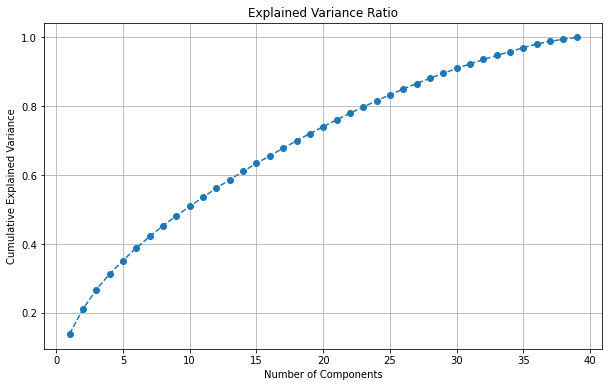

In [4]:
# Apply PCA without specifying the number of components
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [5]:
# Step 4: Apply PCA
n_components = 10  # You can choose the number of components based on your requirements
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Accuracy: 91.79%
Confusion Matrix:
 [[21492  2185]
 [ 1142 15701]]
Sensitivity: 0.9322
Specificity: 0.9077
AUC: 0.9200


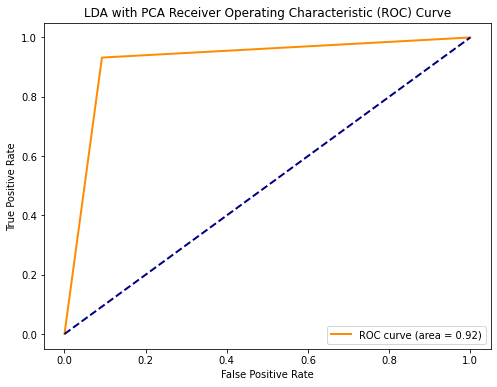

In [6]:
# Step 5: Train a LDA on the reduced dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

# Step 6: Make predictions on the test set
y_pred = lda.predict(X_test_pca)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate sensitivity (true positive rate)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f'Sensitivity: {sensitivity:.4f}')

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.4f}')

# Calculate AUC
auc_score_lda = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc_score_lda:.4f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA with PCA Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 88.80%
Confusion Matrix:
 [[22565  1112]
 [ 3426 13417]]
Sensitivity: 0.7966
Specificity: 0.9530
AUC: 0.8748


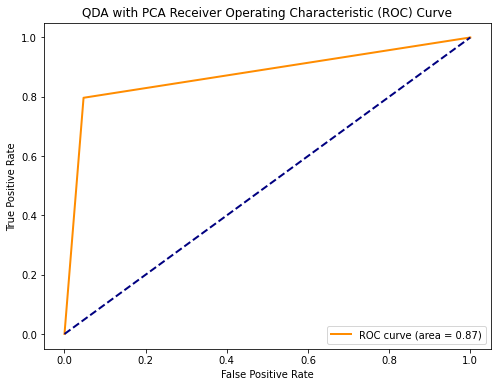

In [7]:
# Step 5: Train a QDA on the reduced dataset
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_pca, y_train)

# Step 6: Make predictions on the test set
y_pred = qda.predict(X_test_pca)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate sensitivity (true positive rate)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f'Sensitivity: {sensitivity:.4f}')

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.4f}')

# Calculate AUC
auc_score_lda = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc_score_lda:.4f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('QDA with PCA Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 92.58%
Confusion Matrix:
 [[21783  1894]
 [ 1113 15730]]
Sensitivity: 0.9339
Specificity: 0.9200
AUC: 0.9270


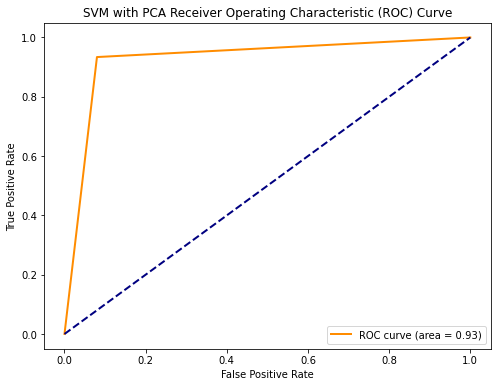

In [8]:
# Step 5: Train SVM
# Create a Support Vector Machine model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_pca, y_train)

# Step 6: Make predictions on the test set
y_pred = svm_model.predict(X_test_pca)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate sensitivity (true positive rate)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f'Sensitivity: {sensitivity:.4f}')

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.4f}')

# Calculate AUC
auc_score_lda = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc_score_lda:.4f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM with PCA Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 91.05%
Confusion Matrix:
 [[21796  1881]
 [ 1747 15096]]
Sensitivity: 0.8963
Specificity: 0.9206
AUC: 0.9084


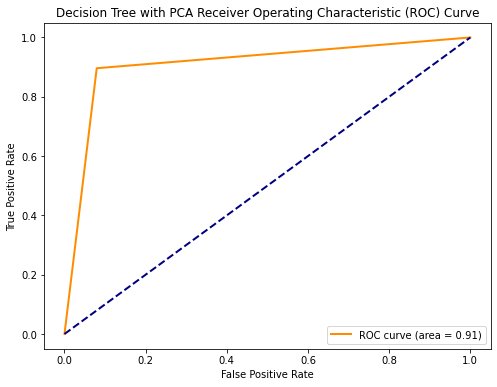

In [9]:
# Step 5: Train Decision Tree
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca, y_train)

# Step 6: Make predictions on the test set
y_pred = dt_classifier.predict(X_test_pca)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate sensitivity (true positive rate)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f'Sensitivity: {sensitivity:.4f}')

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.4f}')

# Calculate AUC
auc_score_lda = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc_score_lda:.4f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree with PCA Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

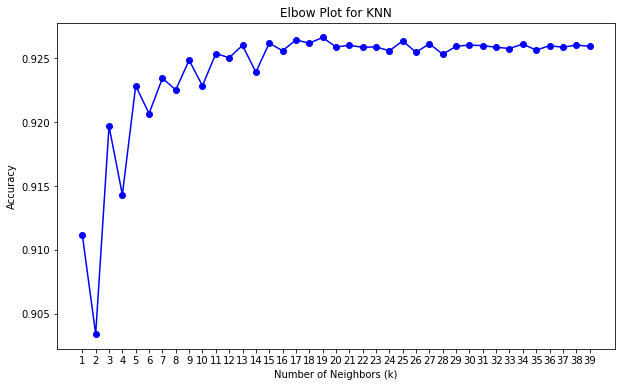

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define a range of neighbors to test
neighbors = list(range(1, 40))  # Adjust the range as needed

# Lists to store accuracy scores
accuracy_scores = []

# Iterate over different number of neighbors
for k in neighbors:
    # Initialize the KNN classifier with k neighbors
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training data
    knn_classifier.fit(X_train_pca, y_train)
    
    # Make predictions on the test data
    predictions = knn_classifier.predict(X_test_pca)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.show()


Accuracy: 92.60%
Confusion Matrix:
 [[22012  1665]
 [ 1334 15509]]
Sensitivity: 0.9208
Specificity: 0.9297
AUC: 0.9252


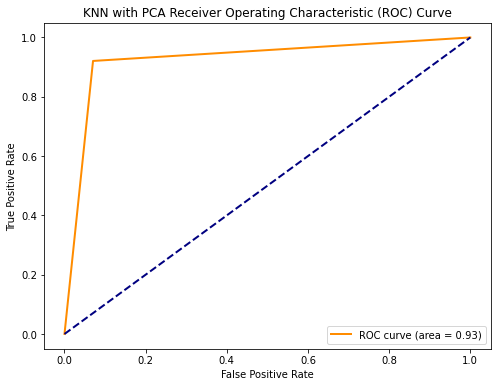

In [16]:
# Step 5: Train KNN
# Initialize the KNN classifier with the desired number of neighbors (e.g., 3)dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors=21)

# Train the classifier on the training data
knn_classifier.fit(X_train_pca, y_train)

# Step 6: Make predictions on the test set
y_pred = knn_classifier.predict(X_test_pca)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate sensitivity (true positive rate)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f'Sensitivity: {sensitivity:.4f}')

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.4f}')

# Calculate AUC
auc_score_lda = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc_score_lda:.4f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN with PCA Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 92.57%
Confusion Matrix:
 [[21994  1683]
 [ 1329 15514]]
Sensitivity: 0.9211
Specificity: 0.9289
AUC: 0.9250


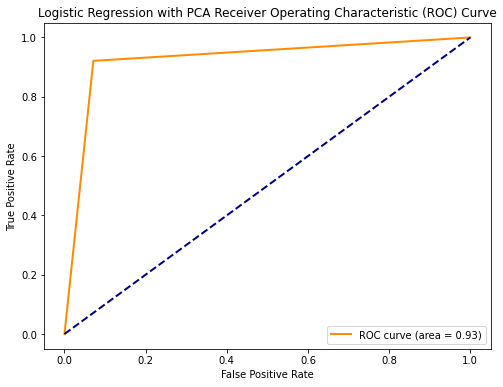

In [12]:
from sklearn.linear_model import LogisticRegression 

# Step 5: Train Log REgression model
# Initialize the Log Regression classifier
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train_pca, y_train)

# Step 6: Make predictions on the test set
y_pred = logistic_model.predict(X_test_pca)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate sensitivity (true positive rate)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
print(f'Sensitivity: {sensitivity:.4f}')

# Calculate specificity (true negative rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'Specificity: {specificity:.4f}')

# Calculate AUC
auc_score_lda = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc_score_lda:.4f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression with PCA Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

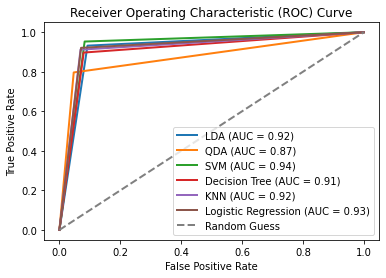

In [13]:
# Lists to store fpr and tpr for each model
fpr_list = []
tpr_list = []
roc_auc_list = []

# Function to train, evaluate, and plot ROC curve for a given model
def train_and_plot_roc(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_pred)
    roc_auc_list.append(auc_score)
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    # Store fpr and tpr
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')

# Train and plot ROC curve for LDA
train_and_plot_roc(LinearDiscriminantAnalysis(), 'LDA', X_train_pca, X_test_pca, y_train, y_test)

# Train and plot ROC curve for QDA
train_and_plot_roc(QuadraticDiscriminantAnalysis(), 'QDA', X_train_pca, X_test_pca, y_train, y_test)

# Train and plot ROC curve for SVM
train_and_plot_roc(SVC(probability=True), 'SVM', X_train_pca, X_test_pca, y_train, y_test)

# Train and plot ROC curve for Decision Tree
train_and_plot_roc(DecisionTreeClassifier(), 'Decision Tree', X_train_pca, X_test_pca, y_train, y_test)

# Train and plot ROC curve for KNN
train_and_plot_roc(KNeighborsClassifier(), 'KNN', X_train_pca, X_test_pca, y_train, y_test)

# Train and plot ROC curve for Logistic Regression
train_and_plot_roc(LogisticRegression(), 'Logistic Regression', X_train_pca, X_test_pca, y_train, y_test)

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCA Analysis Receiver Operating Characteristic (ROC) Curve')

# Add legend
plt.legend(loc="lower right")

# Show the plot
plt.show()
